# `TARGET PROJECT`

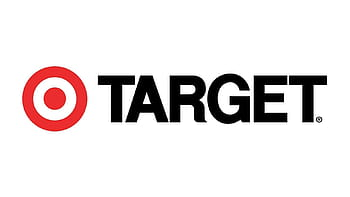

In [1]:
import pandas as pd 
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
from pymysql import connect
# !pip install pymysql
import warnings
warnings.filterwarnings('ignore')

## Context:

Target is a globally renowned brand and a prominent retailer in the United States. Target makes itself a preferred shopping destination by offering outstanding value, inspiration, innovation and an exceptional guest experience that no other retailer can deliver.

This particular business case focuses on the operations of Target in Brazil and provides insightful information about 100,000 orders placed between 2016 and 2018. The dataset offers a comprehensive view of various dimensions including the order status, price, payment and freight performance, customer location, product attributes, and customer reviews.

By analyzing this extensive dataset, it becomes possible to gain valuable insights into Target's operations in Brazil. The information can shed light on various aspects of the business, such as order processing, pricing strategies, payment and shipping efficiency, customer demographics, product characteristics, and customer satisfaction levels.

___________________________________________________________________________________________________________

The data is available in 8 csv files:

customers.csv

sellers.csv

order_items.csv

geolocation.csv

payments.csv

reviews.csv

orders.csv

products.csv
___________________________________________________________________________________________________________

The column description for these csv files is given below.

1) The customers.csv contain following features:

- customer_id- ID of the consumer who made the purchase

- customer_unique_id- Unique ID of the consumer

- customer_zip_code_prefix- Zip Code of consumer’s location

- customer_city- Name of the City from where order is made

- customer_state- State Code from where order is made (Eg. são paulo - SP)

2) The sellers.csv contains following features:

- seller_id- Unique ID of the seller registered

- seller_zip_code_prefix- Zip Code of the seller’s location

- seller_city- Name of the City of the seller

- seller_state- State Code (Eg. são paulo - SP)

3) The order_items.csv contain following features:

- order_id- A Unique ID of order made by the consumers

- order_item_id- A Unique ID given to each item ordered in the order

- product_id- A Unique ID given to each product available on the site

- seller_id- Unique ID of the seller registered in Target

- shipping_limit_date- The date before which the ordered product must be shipped

- price- Actual price of the products ordered

- freight_value- Price rate at which a product is delivered from one point to another

4) The geolocations.csv contain following features:

- geolocation_zip_code_prefix- First 5 digits of Zip Code

- geolocation_lat- Latitude

- geolocation_lng- Longitude

- geolocation_city- City

- geolocation_state- State

5) The payments.csv contain following features:

- order_id- A Unique ID of order made by the consumers

- payment_sequential- Sequences of the payments made in case of EMI

- payment_type- Mode of payment used (Eg. Credit Card)

- payment_installments- Number of installments in case of EMI purchase

- payment_value- Total amount paid for the purchase order

6) The orders.csv contain following features:

- order_id- A Unique ID of order made by the consumers

- customer_id- ID of the consumer who made the purchase

- order_status- Status of the order made i.e. delivered, shipped, etc.

- order_purchase_timestamp- Timestamp of the purchase

- order_delivered_carrier_date- Delivery date at which carrier made the delivery

- order_delivered_customer_date- Date at which customer got the product

- order_estimated_delivery_date- Estimated delivery date of the products

7) The reviews.csv contain following features:

- review_id- ID of the review given on the product ordered by the order id

- order_id- A Unique ID of order made by the consumers

- review_score- Review score given by the customer for each order on a scale of 1-5

- review_comment_title- Title of the review

- review_comment_message- Review comments posted by the consumer for each order

- review_creation_date- Timestamp of the review when it is created

- review_answer_timestamp- Timestamp of the review answered

8) The products.csv contain following features:

- product_id- A Unique identifier for the proposed project.

- product_category_name- Name of the product category

- product_name_lenght- Length of the string which specifies the name given to the products ordered

- product_description_lenght- Length of the description written for each product ordered on the site

- product_photos_qty- Number of photos of each product ordered available on the shopping portal

- product_weight_g- Weight of the products ordered in grams

- product_length_cm- Length of the products ordered in centimeters

- product_height_cm- Height of the products ordered in centimeters

- product_width_cm- Width of the product ordered in centimeters



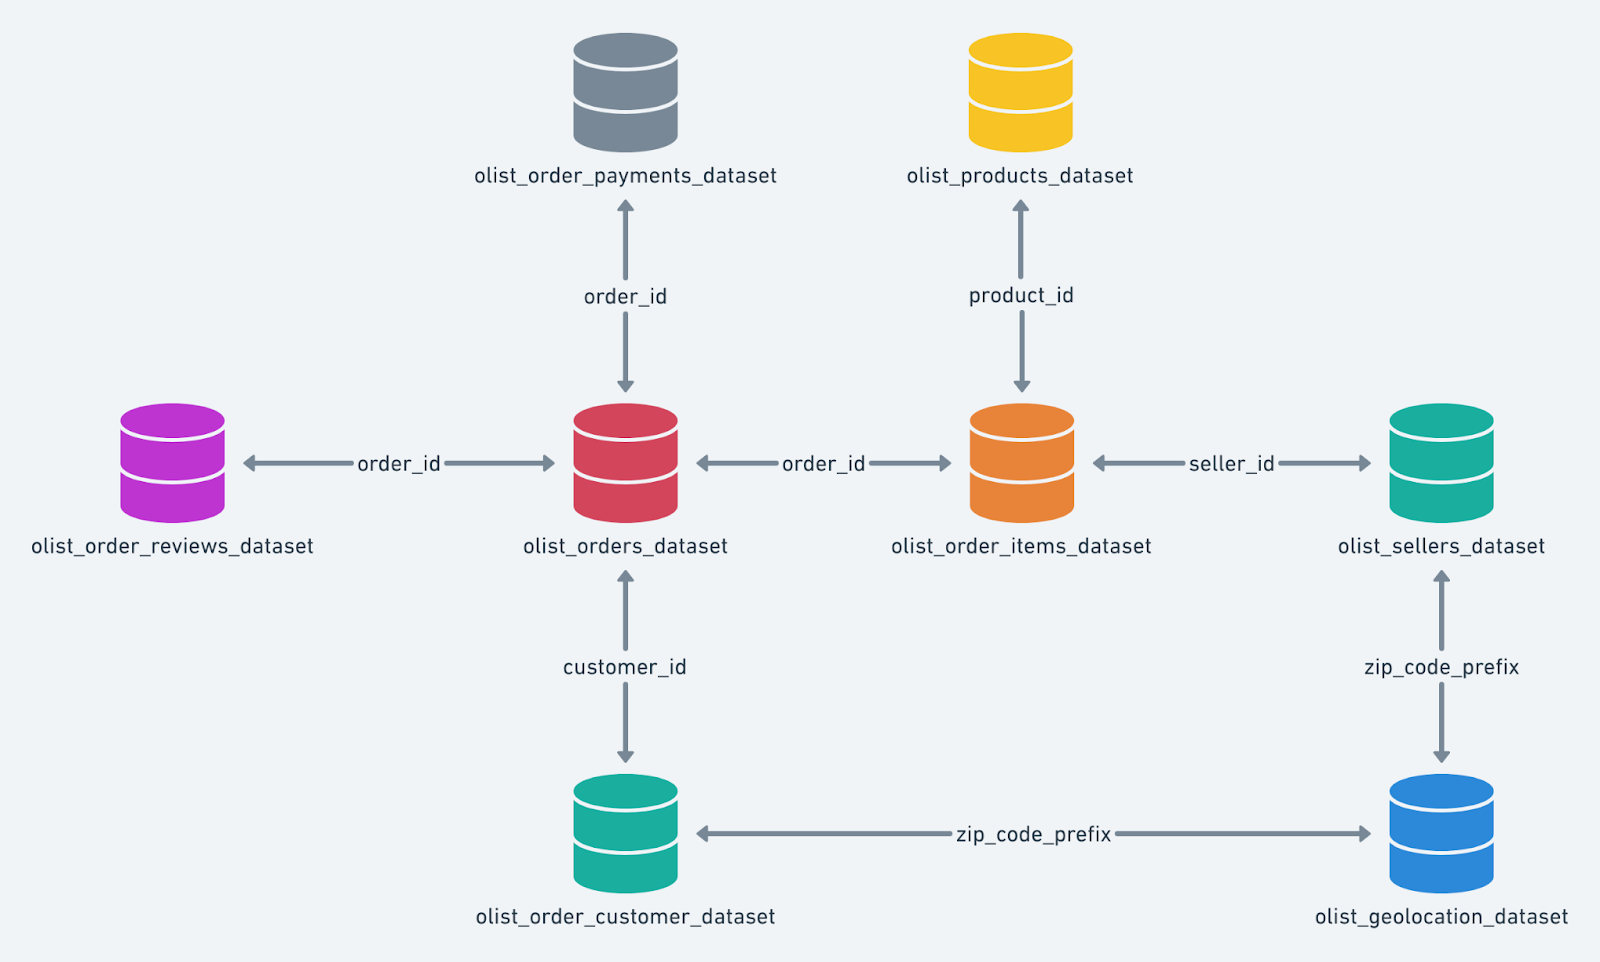

In [2]:
data_base = connect(host='localhost',user='root',password='noohinaaz96')
cur = data_base.cursor()
query = 'show databases'
cur.execute(query)
data_bases = cur.fetchall()
for data in data_bases:
    print(data)

('employees',)
('farmers_market',)
('imdb',)
('information_schema',)
('medal',)
('murder',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('target',)


In [3]:
data_base = connect(host='localhost',user='root',password='noohinaaz96',database = 'target')
cur = data_base.cursor()
query = 'show tables'
cur.execute(query)
tables = cur.fetchall()
print(tables)

(('customers',), ('geolocation',), ('order_items',), ('order_reviews',), ('orders',), ('payments',), ('products',), ('sellers',))


##### `1.Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset:`

- Data type of all columns in the "customers" table.
- Get the time range between which the orders were placed.
- Count the Cities & States of customers who ordered during the given period.

In [4]:
query1 = "SHOW COLUMNS FROM customers"
query2 = "SHOW COLUMNS FROM geolocation "
query3 = "SHOW COLUMNS FROM order_items"
query4 = "SHOW COLUMNS FROM order_reviews "
query5 = "SHOW COLUMNS FROM payments"
query6 = "SHOW COLUMNS FROM orders"
query7 = "SHOW COLUMNS FROM products"
query8 = "SHOW COLUMNS FROM sellers"
cur.execute(query1)
cur.execute(query2)
cur.execute(query3)
cur.execute(query4)
cur.execute(query5)
cur.execute(query6)
cur.execute(query7)
cur.execute(query8)
col1 = pd.read_sql_query(query1,data_base)
col2 = pd.read_sql_query(query2,data_base)
col3 = pd.read_sql_query(query3,data_base)
col4 = pd.read_sql_query(query4,data_base)
col5 = pd.read_sql_query(query5,data_base)
col6 = pd.read_sql_query(query6,data_base)
col7 = pd.read_sql_query(query7,data_base)
col8 = pd.read_sql_query(query8,data_base)
data_types = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8], ignore_index=True, axis=0)
data_types

,Field,Type,Null,Key,Default,Extra
0,customer_id,varchar(50),NO,PRI,None,
1,customer_unique_id,varchar(50),YES,,None,
2,customer_zip_code_prefix,int,YES,,None,
3,customer_city,varchar(50),YES,,None,
4,customer_state,varchar(10),YES,,None,
5,geolocation_zip_code_prefix,bigint,YES,,None,
6,geolocation_lat,double,YES,,None,
7,geolocation_lng,double,YES,,None,
8,geolocation_city,text,YES,,None,
9,geolocation_state,text,YES,,None,


In [5]:
# time range between the orders were placed
query1 = """select min(year(order_purchase_timestamp)) as 'start time', 
max(year(order_purchase_timestamp)) as 'end time',
max(year(order_purchase_timestamp)) - min(year(order_purchase_timestamp)) as 'time period'
from target.orders """
cur.execute(query1)
time= pd.read_sql_query(query1,data_base)
time

,start time,end time,time period
0,2016,2018,2


In [6]:
# Count the Cities & States of customers who ordered during the given period.
query2 = """select count(distinct(customer_city)) as 'total cities',
count(distinct(customer_state)) as 'total states',
count(distinct(customer_unique_id)),
count(distinct(customer_zip_code_prefix))
from target.customers """
cur.execute(query2)
city_state= pd.read_sql_query(query2,data_base)
city_state

,total cities,total states,count(distinct(customer_unique_id)),count(distinct(customer_zip_code_prefix))
0,4119,27,96096,14994


In [7]:
query3 = "select customer_city, count(customer_city) as frequency from target.customers group by customer_city "
cur.execute(query3)
city= pd.read_sql_query(query3,data_base)
city.T

,0,1,2,3,4,5,6,7,8,9,...,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118
customer_city,osasco,itapecerica,nova venecia,mendonca,sao paulo,valinhos,niteroi,rio de janeiro,ijui,oliveira,...,brejo bonito,formosa da serra negra,divinesia,monte belo do sul,ivora,adhemar de barros,desterro do melo,eugenio de castro,capivari do sul,anhandui
frequency,746,13,19,5,15540,183,849,6882,52,22,...,1,1,1,1,1,1,1,1,1,1


In [8]:
query4 = "select review_score, count(review_score) as frequency from target.order_reviews group by review_score "
cur.execute(query4)
score= pd.read_sql_query(query4,data_base)
score

,review_score,frequency
0,4.0,19142
1,5.0,57328
2,1.0,11424
3,3.0,8179
4,2.0,3151


In [9]:
query5 = "select payment_type, count(payment_type) as 'total counts' from target.payments group by payment_type "
cur.execute(query5)
money= pd.read_sql_query(query5,data_base)
money

,payment_type,total counts
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [10]:
query6 = "select product_category, count(product_category) as frequency from target.products group by product_category order by 2 desc limit 20"
cur.execute(query6)
famous_products= pd.read_sql_query(query6,data_base)
famous_products

,product_category,frequency
0,bed table bath,3029
1,sport leisure,2867
2,Furniture Decoration,2657
3,HEALTH BEAUTY,2444
4,housewares,2335
5,automotive,1900
6,computer accessories,1639
7,toys,1411
8,Watches present,1329
9,telephony,1134


In [11]:
query7 = """select count(seller_city),
count(distinct(seller_zip_code_prefix)),
count(distinct(seller_state))
from target.sellers """
cur.execute(query7)
sellers_info = pd.read_sql_query(query7,data_base)
sellers_info

,count(seller_city),count(distinct(seller_zip_code_prefix)),count(distinct(seller_state))
0,3095,2246,23


`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

##### `2. In-depth Exploration:`
- Is there a growing trend in the no. of orders placed over the past years?
- Can we see some kind of monthly seasonality in terms of the no. of orders being placed?
- During what time of the day, do the Brazilian customers mostly place their orders? (Dawn, Morning, Afternoon or Night)
    * 0-6 hrs : Dawn
    * 7-12 hrs : Mornings
    * 13-18 hrs : Afternoon
    * 19-23 hrs : Night

In [12]:
query8 = """select YEAR(order_purchase_timestamp) as 'year', count(order_id) as 'total orders',
COUNT(order_id) / SUM(COUNT(order_id)) OVER () * 100 AS 'percentage_of_total'
from target.orders group by year order by 1"""
cur.execute(query8)
year_data = pd.read_sql_query(query8,data_base)
year_data

,year,total orders,percentage_of_total
0,2016,329,0.3308
1,2017,45101,45.3545
2,2018,54011,54.3146


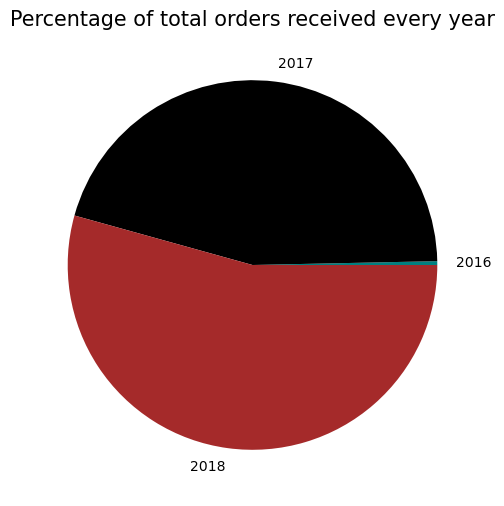

In [13]:
plt.figure(figsize =(10,6))
plt.pie(year_data['percentage_of_total'], labels = year_data['year'],colors=['teal','black','brown'])
plt.title('Percentage of total orders received every year',fontsize=15)
plt.show()

In [14]:
query9 = """select MONTH(order_purchase_timestamp) as 'month', 
YEAR(order_purchase_timestamp) as 'year',
count(order_id) as 'total orders'
from target.orders group by 1,2 order by 2,1 """
cur.execute(query9)
month_data = pd.read_sql_query(query9,data_base)
month_data.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
month,9,10,12,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
year,2016,2016,2016,2017,2017,2017,2017,2017,2017,2017,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
total orders,4,324,1,800,1780,2682,2404,3700,3245,4026,...,7269,6728,7211,6939,6873,6167,6292,6512,16,4


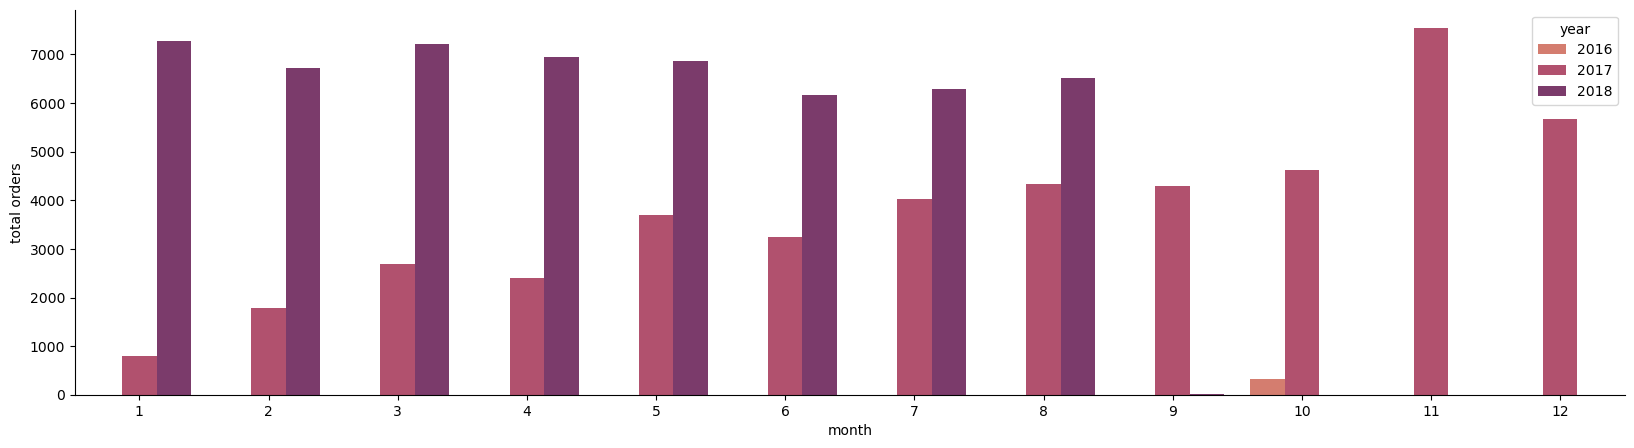

In [15]:
plt.figure(figsize=(20,5))
sns.barplot(x=month_data['month'],y=month_data['total orders'],hue=month_data['year'],palette="flare")
sns.despine()

In [16]:
query10 = """select QUARTER(order_purchase_timestamp) as 'quarter',
YEAR(order_purchase_timestamp) as 'year',
count(order_id) as 'total orders' from target.orders group by 1,2 order by 2,1 """
cur.execute(query10)
quarter_data = pd.read_sql_query(query10,data_base)
quarter_data

,quarter,year,total orders
0,3,2016,4
1,4,2016,325
2,1,2017,5262
3,2,2017,9349
4,3,2017,12642
5,4,2017,17848
6,1,2018,21208
7,2,2018,19979
8,3,2018,12820
9,4,2018,4


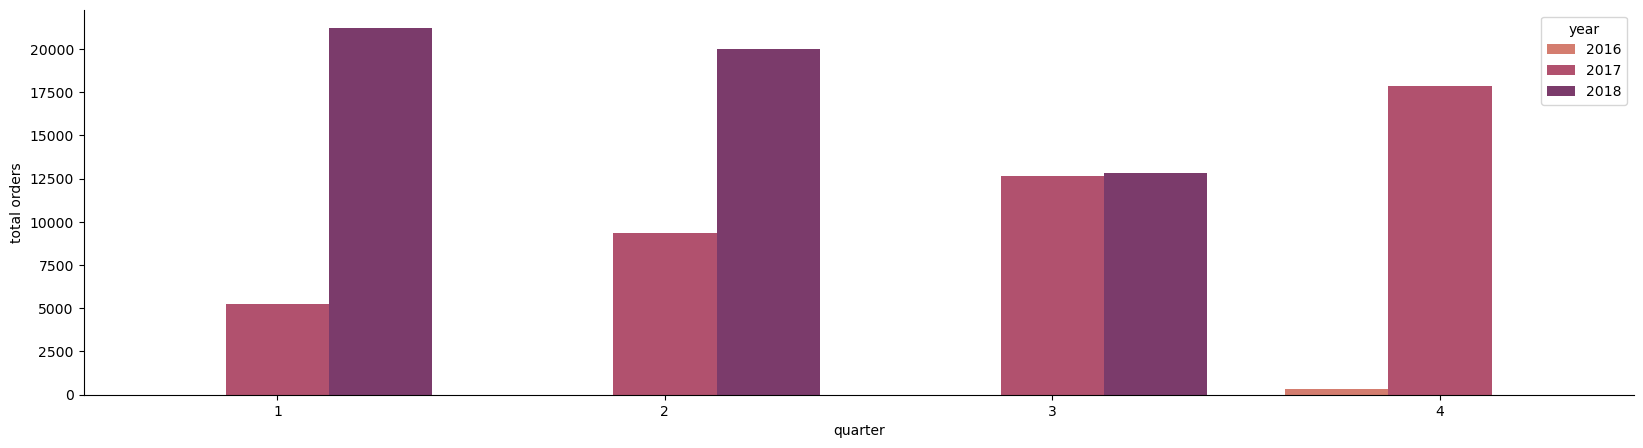

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(x=quarter_data['quarter'],y=quarter_data['total orders'],hue=quarter_data['year'],palette="flare")
sns.despine()

In [18]:
query11 = "select week(order_purchase_timestamp) as 'week', count(order_id) as 'total orders' from target.orders group by 1 order by 1 "
cur.execute(query11)
week_data = pd.read_sql_query(query11,data_base)
week_data.T

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
week,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
total orders,1187,1786,1858,1814,1903,2040,2169,2156,2277,2130,...,930,1187,1329,2775,2255,1736,1458,1053,862,74


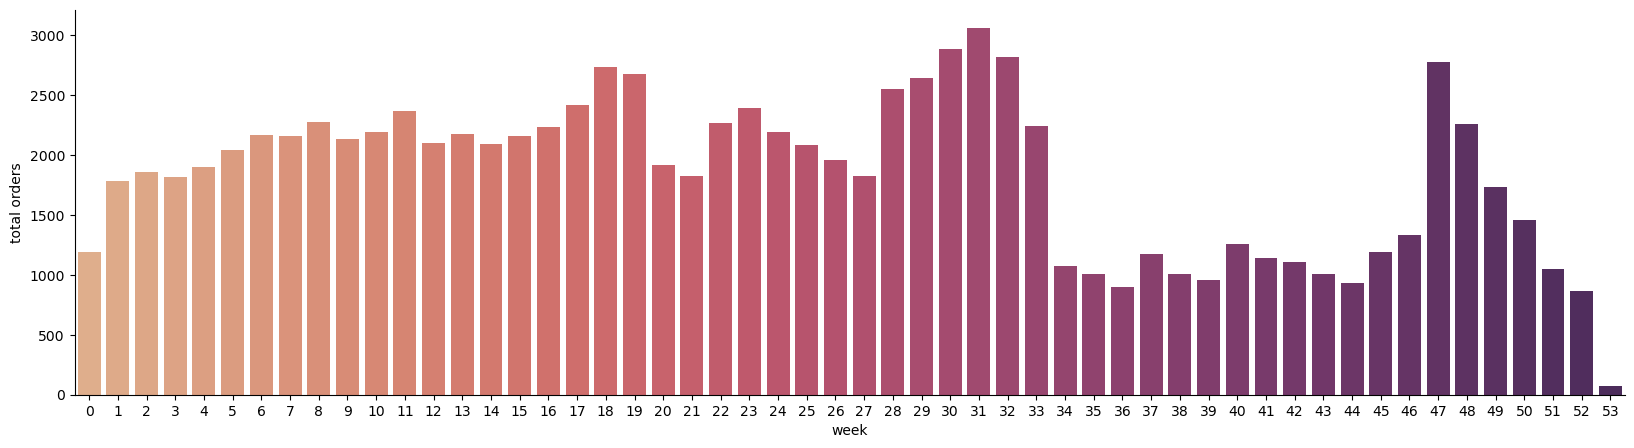

In [19]:
plt.figure(figsize=(20,5))
sns.barplot(x=week_data['week'],y=week_data['total orders'],palette="flare")
sns.despine()

In [20]:
query12 = """select HOUR(order_purchase_timestamp) as hour,
count(HOUR(order_purchase_timestamp)) as counting
from target.orders 
group by 1 """
cur.execute(query12)
hour_data = pd.read_sql_query(query12,data_base)
hour_data.T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
hour,8,10,14,13,21,11,12,18,22,17,...,23,16,15,6,2,1,7,4,5,3
counting,2967,6177,6569,6518,6217,6578,5995,5769,5816,6150,...,4123,6675,6454,502,510,1170,1231,206,188,272


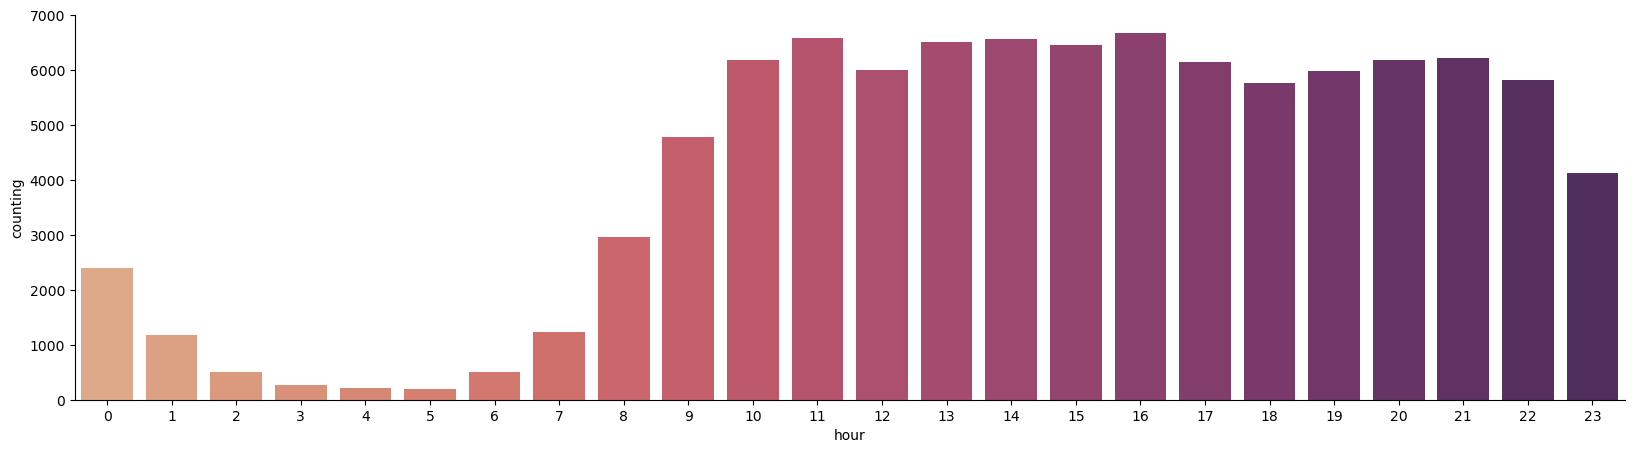

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(x=hour_data['hour'],y=hour_data['counting'],palette="flare")
sns.despine()

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

##### `3. Evolution of E-commerce orders in the Brazil region:`
- Get the month on month no. of orders placed in each state.
- How are the customers distributed across all the states?

In [22]:
# number of order each month in each state
query13 = """select x.customer_state, x.month, count(x.order_id) as 'total orders'
from
(select customer_state,
month(order_delivered_customer_date) month,
order_id
from target.orders o join target.customers c using(customer_id)) x
group by customer_state,month
having month != 0
order by customer_state,month"""
cur.execute(query13)
state_order_month = pd.read_sql_query(query13,data_base)
state_order_month.T

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
customer_state,AC,AC,AC,AC,AC,AC,AC,AC,AC,AC,...,TO,TO,TO,TO,TO,TO,TO,TO,TO,TO
month,1,2,3,4,5,6,7,8,9,10,...,3,4,5,6,7,8,9,10,11,12
total orders,8,5,8,2,13,8,7,12,4,7,...,33,29,39,30,20,35,12,19,8,20


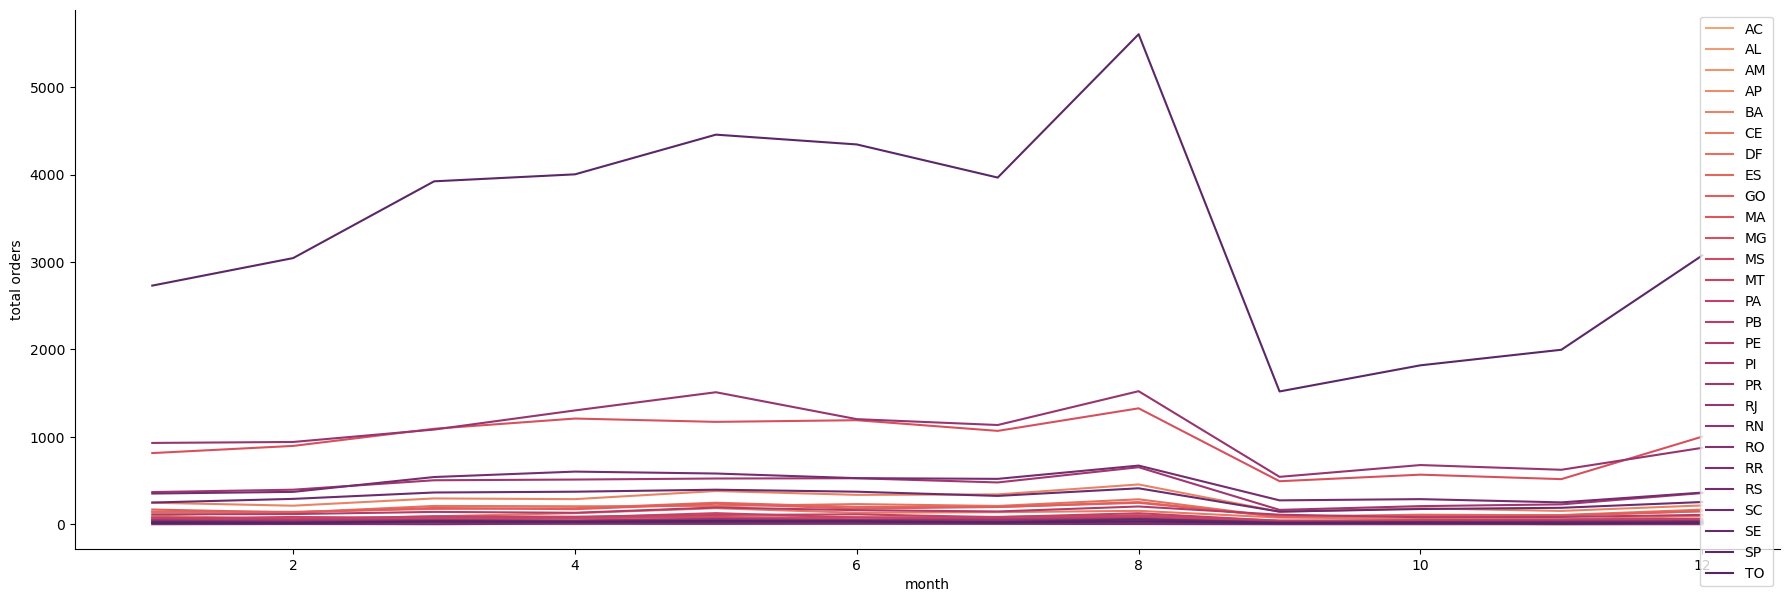

In [23]:
plt.figure(figsize=(22,7))
sns.lineplot(x=state_order_month['month'],y=state_order_month['total orders'],hue=state_order_month['customer_state'],palette="flare")
plt.legend(loc='upper right')
sns.despine()
plt.show()

In [24]:
# customer distribution across the states
query14 = """select x.customer_state,  count(x.order_id) as 'total orders'
from
(select customer_state,
order_id
from target.orders o join target.customers c using(customer_id)) x
group by customer_state
order by 2"""
cur.execute(query14)
state_order = pd.read_sql_query(query14,data_base)
state_order.T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
customer_state,RR,AP,AC,AM,RO,TO,SE,AL,RN,PI,...,GO,ES,DF,BA,SC,PR,RS,MG,RJ,SP
total orders,46,68,81,148,253,280,350,413,485,495,...,2020,2033,2140,3380,3637,5045,5466,11635,12852,41746


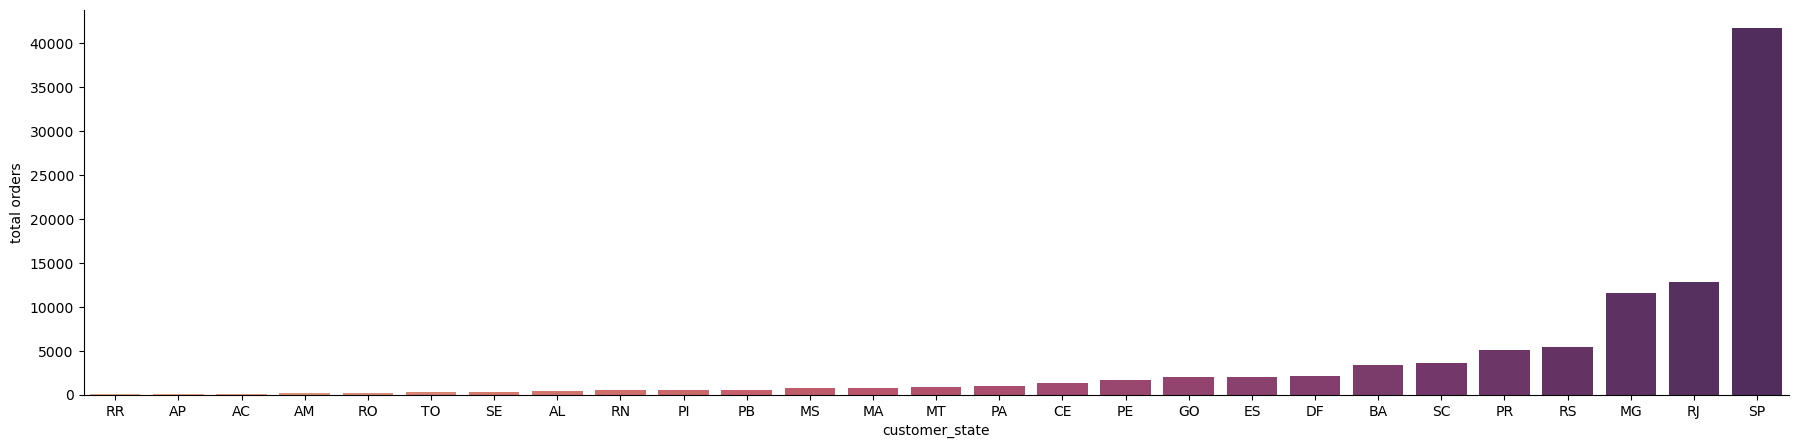

In [25]:
plt.figure(figsize=(22,5))
sns.barplot(x=state_order['customer_state'],y=state_order['total orders'],palette="flare")
sns.despine()
plt.show()

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

##### `4. Impact on Economy: Analyze the money movement by e-commerce by looking at order prices, freight and others.`
- Get the % increase in the cost of orders from year 2017 to 2018 (include months between Jan to Aug only). You can use the "payment_value" column in the payments table to get the cost of orders.
- Calculate the Total & Average value of order price for each state.
- Calculate the Total & Average value of order freight for each state.


In [26]:
# % increase in the cost of orders from year 2017 to 2018 
query15 = """ select year(order_delivered_customer_date) as 'year',
month(order_delivered_customer_date) as 'month',
sum(payment_value) as 'payment_value'
from target.orders as o
join payments as p using(order_id)
group by 1,2
having month between 1 and 8
order by 1,2"""
cur.execute(query15)
monthly_payment = pd.read_sql_query(query15,data_base)
monthly_payment

,year,month,payment_value
0,2017,1,38708.63
1,2017,2,228152.25
2,2017,3,387275.32
3,2017,4,307722.84
4,2017,5,600917.76
5,2017,6,502197.97
6,2017,7,531271.71
7,2017,8,627367.19
8,2018,1,993588.74
9,2018,2,875514.19


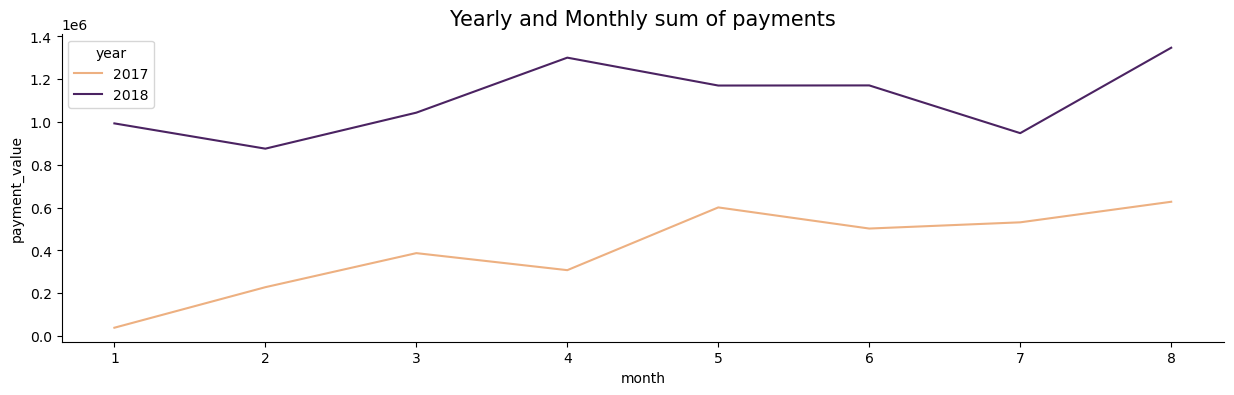

In [27]:
plt.figure(figsize=(15,4))
sns.lineplot(x=monthly_payment['month'],y=monthly_payment['payment_value'],hue=monthly_payment['year'],palette="flare")
plt.title('Yearly and Monthly sum of payments',fontsize=15)
sns.despine()
plt.show()

In [28]:
#  Total value of order price for each state.
query16 = """ select c.customer_state,
ROUND(sum(price),2) as 'price'
from target.customers as c
join orders as o using(customer_id)
join order_items as ot using(order_id)
group by 1"""
cur.execute(query16)
state_price = pd.read_sql_query(query16,data_base)
state_price.T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
customer_state,RJ,SP,MG,PR,GO,BA,AL,MS,CE,DF,...,PB,AM,AP,PI,TO,RO,RN,SE,AC,RR
price,1824092.67,5202955.05,1585308.03,683083.76,294591.95,511349.99,80314.81,116812.64,227254.71,302603.94,...,115268.08,22356.84,13474.3,86914.08,49621.74,46140.64,83034.98,58920.85,15982.95,7829.43


In [29]:
# Total value of order freight for each state.
query17 = """ select c.customer_state,
ROUND(sum(freight_value),2) as 'freight'
from target.customers as c
join orders as o using(customer_id)
join order_items as ot using(order_id)
group by 1"""
cur.execute(query17)
state_freight = pd.read_sql_query(query17,data_base)
state_freight.T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
customer_state,RJ,SP,MG,PR,GO,BA,AL,MS,CE,DF,...,PB,AM,AP,PI,TO,RO,RN,SE,AC,RR
freight,305589.31,718723.07,270853.46,117851.68,53114.98,100156.68,15914.59,19144.03,48351.59,50625.5,...,25719.73,5478.89,2788.5,21218.2,11732.68,11417.38,18860.1,14111.47,3686.75,2235.19


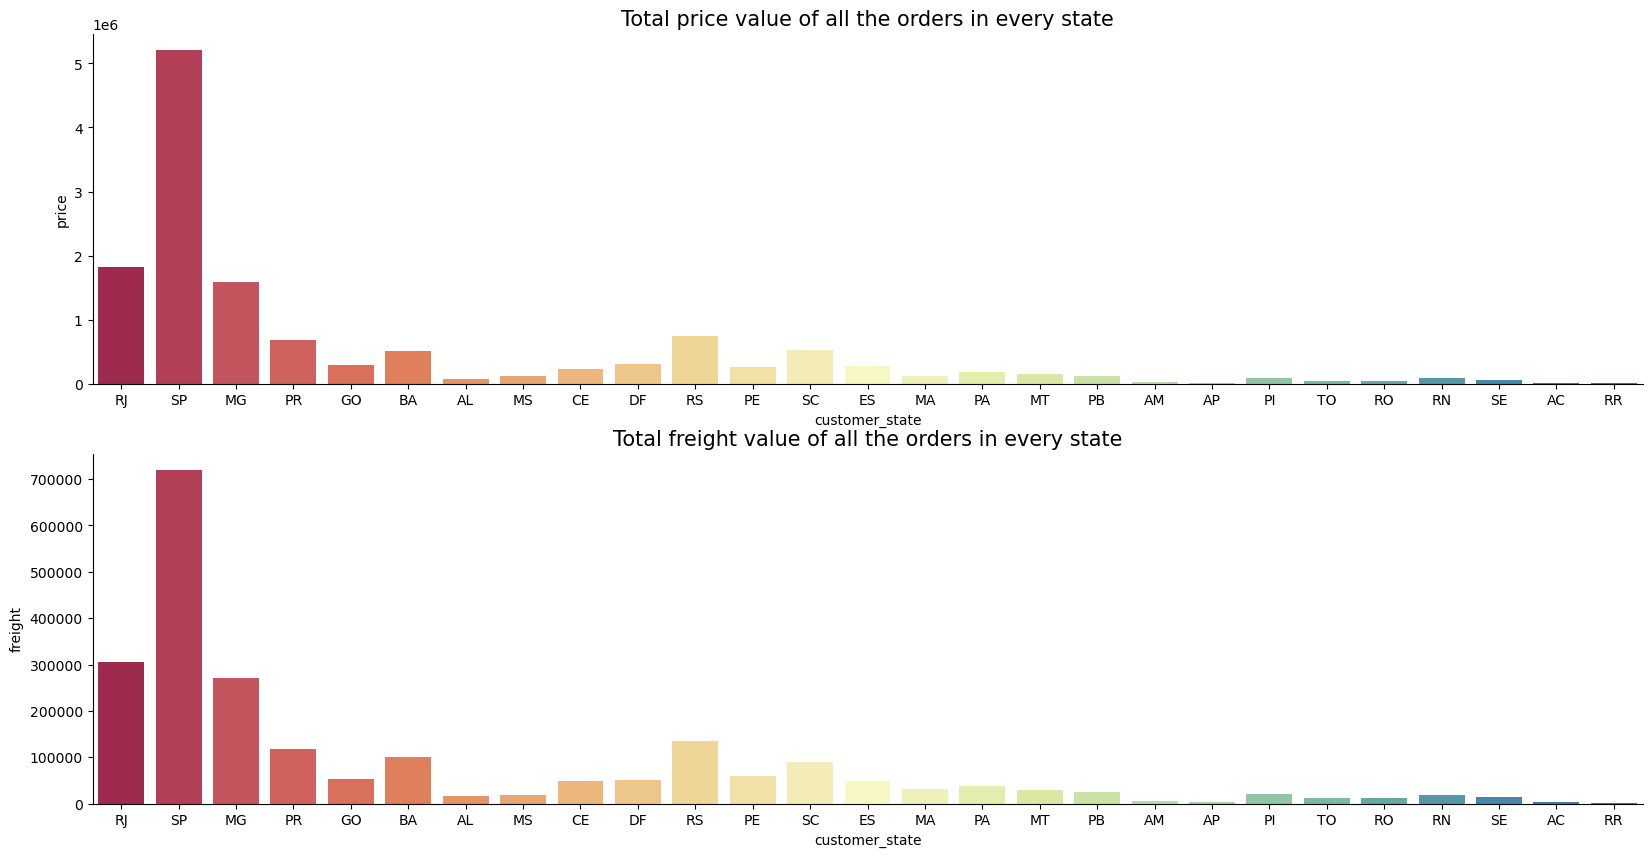

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(x=state_price['customer_state'],y=state_price['price'],palette="Spectral")
plt.title('Total price value of all the orders in every state',fontsize=15)
plt.subplot(2,1,2)
sns.barplot(x=state_freight['customer_state'],y=state_freight['freight'],palette="Spectral")
plt.title('Total freight value of all the orders in every state',fontsize=15)
sns.despine()

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

### `5.Analysis based on sales, freight and delivery time.`
- Find the no. of days taken to deliver each order from the order’s purchase date as delivery time. Also, calculate the difference (in days) between the estimated & actual delivery date of an order. Do this in a single query.You can calculate the delivery time and the difference between the estimated & actual delivery date using the given formula:
  - time_to_deliver = order_delivered_customer_date - order_purchase_timestamp
  - diff_estimated_delivery = order_estimated_delivery_date - order_delivered_customer_date
- Find out the top 5 states with the highest & lowest average freight value.
- Find out the top 5 states with the highest & lowest average delivery time.
- Find out the top 5 states where the order delivery is really fast as compared to the estimated date of delivery. You can use the difference between the averages of actual & estimated delivery date to figure out how fast the delivery was for each state.

In [31]:
query18 ="""select c.customer_state,
datediff(order_delivered_customer_date,order_purchase_timestamp) as 'purchase-to-delivery',
datediff(order_estimated_delivery_date,order_delivered_customer_date) as 'delivery-to-estimate'
from target.orders as o 
join customers as c using(customer_id)
"""
cur.execute(query18)
date_diff_count = pd.read_sql_query(query18,data_base)
date_diff_count

,customer_state,purchase-to-delivery,delivery-to-estimate
0,RJ,7.0,9.0
1,SP,16.0,3.0
2,MG,8.0,14.0
3,SP,6.0,6.0
4,SP,25.0,16.0
...,...,...,...
99436,MA,17.0,8.0
99437,PR,9.0,9.0
99438,SP,5.0,13.0
99439,SP,2.0,9.0


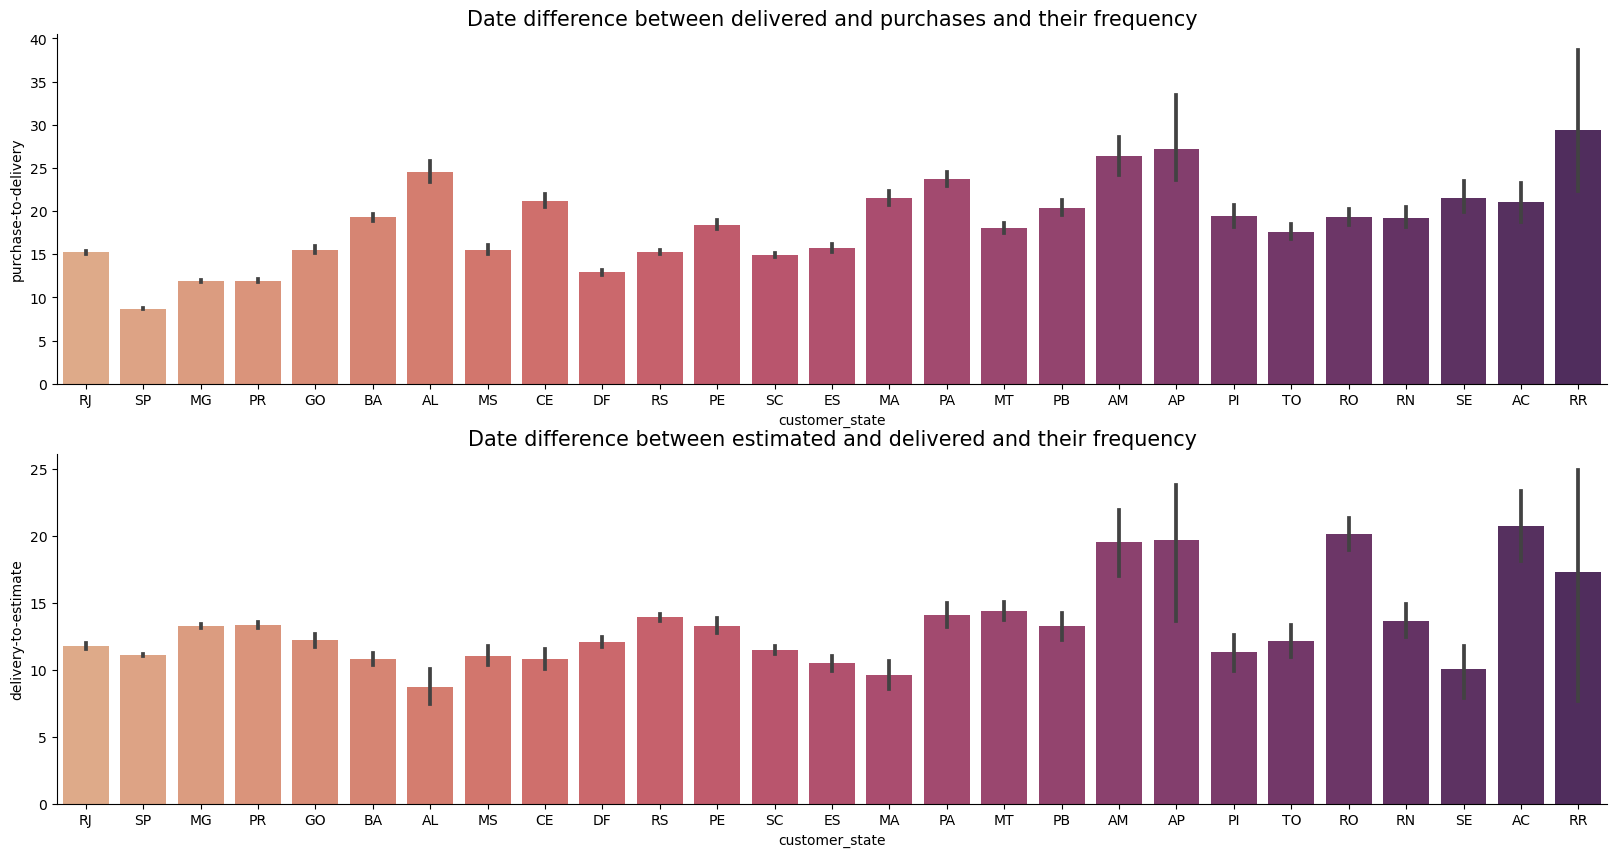

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(x=date_diff_count['customer_state'],y=date_diff_count['purchase-to-delivery'],palette='flare')
plt.title('Date difference between delivered and purchases and their frequency',fontsize=15)
plt.subplot(2,1,2)
sns.barplot(x=date_diff_count['customer_state'],y=date_diff_count['delivery-to-estimate'],palette='flare')
plt.title('Date difference between estimated and delivered and their frequency',fontsize=15)
sns.despine()
plt.show()

In [33]:
query19 =  """ select c.customer_state as 'customer_state1',
ROUND(AVG(freight_value),2) as ' average freight',
c.customer_state as 'customer_state2',
ROUND(AVG(price),2) as 'average price'
from target.customers as c
join orders as o using(customer_id)
join order_items as ot using(order_id)
group by 1
order by 2,4
limit 5"""
cur.execute(query19)
avg_price_freight1= pd.read_sql_query(query19,data_base)
avg_price_freight1

,customer_state1,average freight,customer_state2,average price
0,SP,15.15,SP,109.65
1,PR,20.53,PR,119.00
2,MG,20.63,MG,120.75
3,RJ,20.96,RJ,125.12
4,DF,21.04,DF,125.77


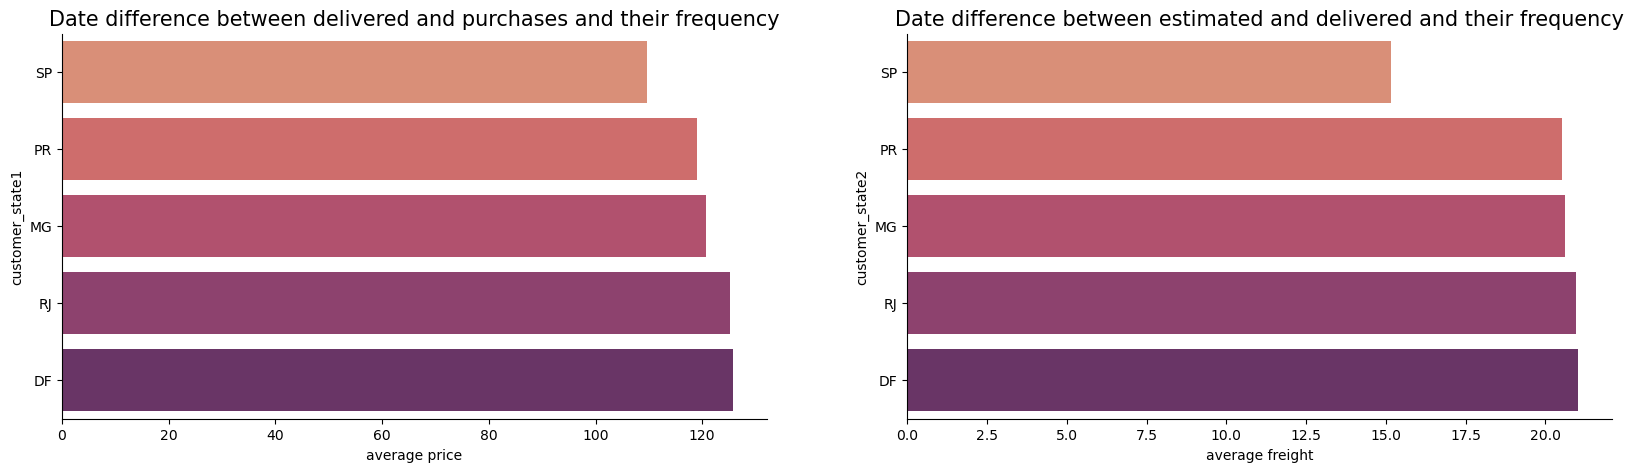

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(y=avg_price_freight1['customer_state1'],x=avg_price_freight1['average price'],palette="flare")
plt.title('Date difference between delivered and purchases and their frequency',fontsize=15)
plt.subplot(1,2,2)
sns.barplot(y=avg_price_freight1['customer_state2'],x=avg_price_freight1['average freight'],palette="flare")
plt.title('Date difference between estimated and delivered and their frequency',fontsize=15)
sns.despine()

In [35]:
query20 =  """ select c.customer_state as 'customer_state1',
ROUND(AVG(freight_value),2) as ' average freight',
c.customer_state as 'customer_state2',
ROUND(AVG(price),2) as 'average price'
from target.customers as c
join orders as o using(customer_id)
join order_items as ot using(order_id)
group by 1
order by 2 desc,4 desc
limit 5"""
cur.execute(query20)
avg_price_freight2= pd.read_sql_query(query20,data_base)
avg_price_freight2

,customer_state1,average freight,customer_state2,average price
0,RR,42.98,RR,150.57
1,PB,42.72,PB,191.48
2,RO,41.07,RO,165.97
3,AC,40.07,AC,173.73
4,PI,39.15,PI,160.36


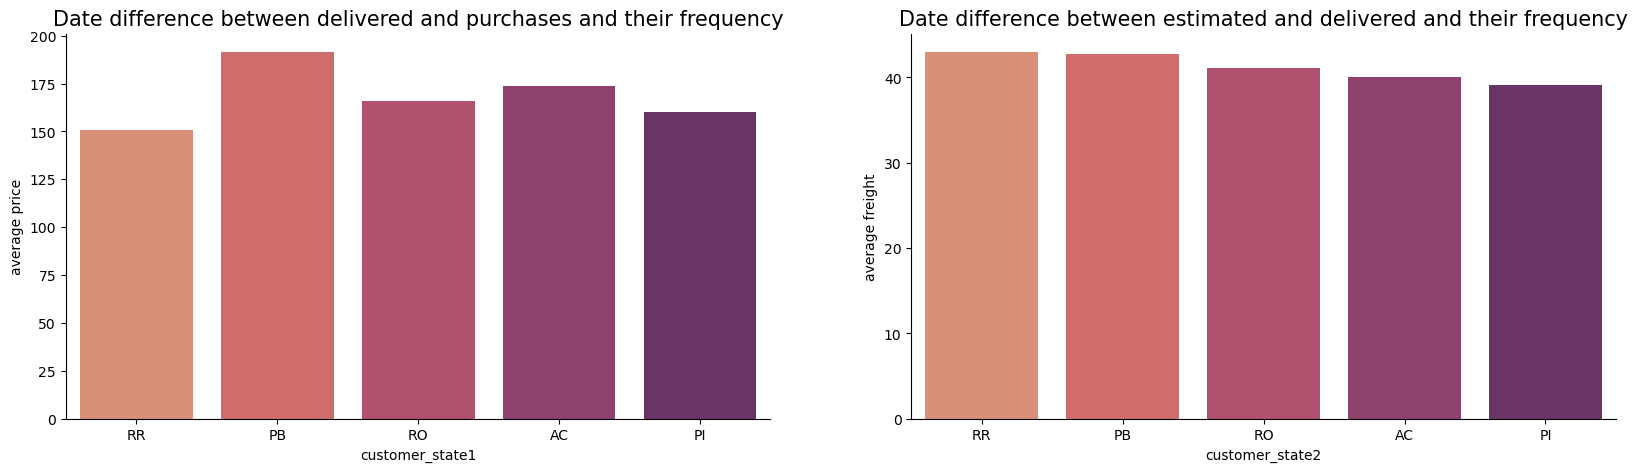

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x=avg_price_freight2['customer_state1'],y=avg_price_freight2['average price'],palette="flare")
plt.title('Date difference between delivered and purchases and their frequency',fontsize=15)
plt.subplot(1,2,2)
sns.barplot(x=avg_price_freight2['customer_state2'],y=avg_price_freight2['average freight'],palette="flare")
plt.title('Date difference between estimated and delivered and their frequency',fontsize=15)
sns.despine()

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

### `6.Analysis based on the payments:`
- Find the month on month no. of orders placed using different payment types.
- Find the no. of orders placed on the basis of the payment installments that have been paid.

In [37]:
query21 =  """select p.payment_type,
month(o.order_delivered_customer_date) as 'month',
count(o.order_id) as 'total orders'
from target.orders as o
join payments as p using(order_id)
group by 1,2
order by 1,2"""

cur.execute(query21)
payment_order_month= pd.read_sql_query(query21,data_base)
payment_order_month

,payment_type,month,total orders
0,credit_card,0,2210
1,credit_card,1,5211
2,credit_card,2,5609
3,credit_card,3,7086
4,credit_card,4,7588
5,credit_card,5,8552
6,credit_card,6,7847
7,credit_card,7,7094
8,credit_card,8,9654
9,credit_card,9,3045


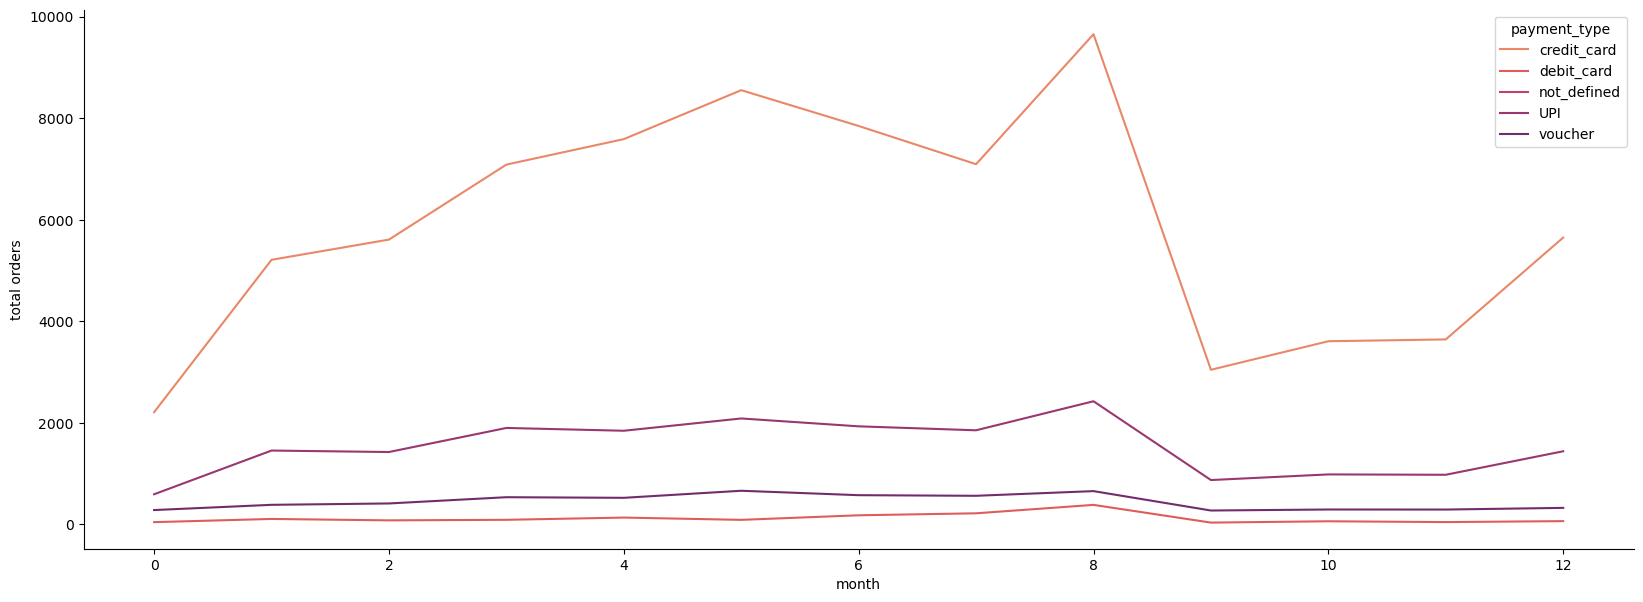

In [38]:
plt.figure(figsize=(20,7))
sns.lineplot(x=payment_order_month['month'],y=payment_order_month['total orders'],hue=payment_order_month['payment_type'],palette="flare")
sns.despine()
plt.show()

In [39]:
query22 =  """select payment_installments,
count(order_id) as 'total orders'
from target.payments
group by 1
having payment_installments != 0
order by 1"""

cur.execute(query22)
payment_installment= pd.read_sql_query(query22,data_base)
payment_installment

,payment_installments,total orders
0,1,52546
1,2,12413
2,3,10461
3,4,7098
4,5,5239
5,6,3920
6,7,1626
7,8,4268
8,9,644
9,10,5328


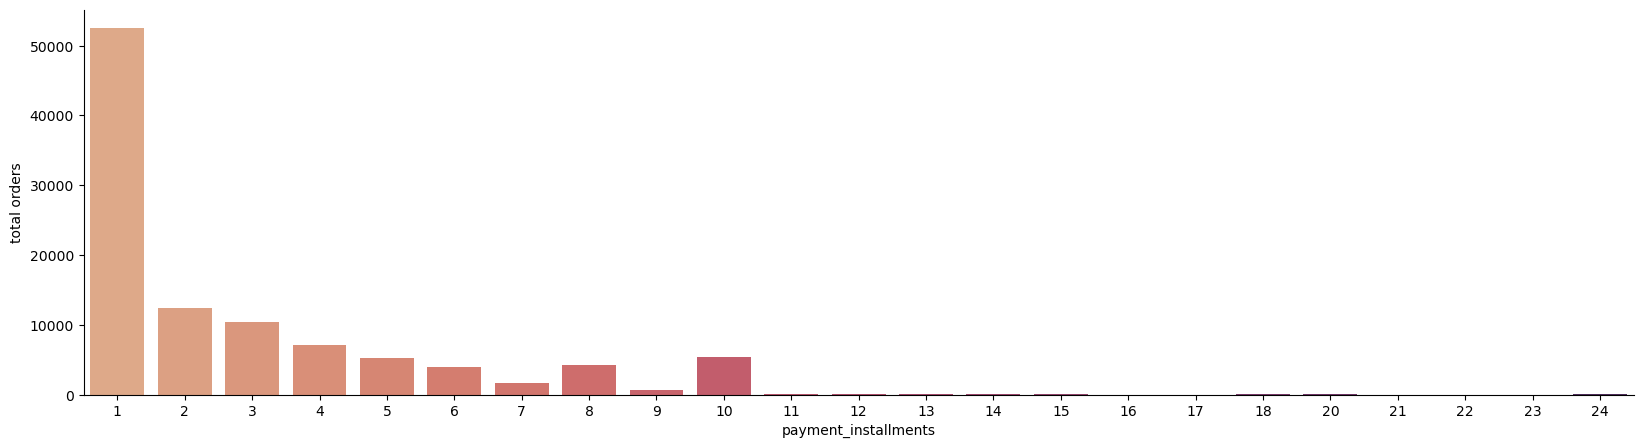

In [40]:
plt.figure(figsize=(20,5))
sns.barplot(x=payment_installment['payment_installments'],y=payment_installment['total orders'],palette="flare")
sns.despine()
plt.show()

In [41]:
query23 = "select payment_type, sum(payment_value) as total from target.payments group by payment_type order by 2 "
cur.execute(query23)
payment_total= pd.read_sql_query(query23,data_base)
payment_total

,payment_type,total
0,not_defined,0.000000e+00
1,debit_card,2.179898e+05
2,voucher,3.794369e+05
3,UPI,2.869361e+06
4,credit_card,1.254208e+07


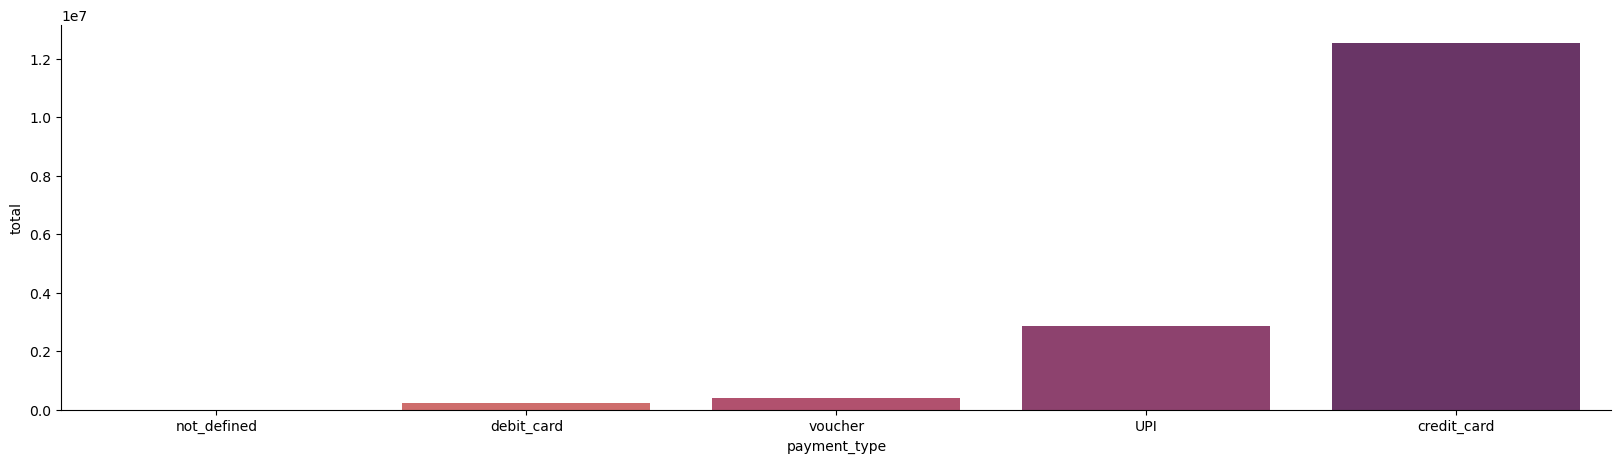

In [42]:
plt.figure(figsize=(20,5))
sns.barplot(x=payment_total['payment_type'],y=payment_total['total'],palette="flare")
sns.despine()
plt.show()

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`

`-------------------------------------------------------------------------------------------------------------------------------------------------------------------`